<a href="https://colab.research.google.com/github/kmadhavan2000/DL/blob/main/Copy_of_Car_Licenseplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras_retinanet import models
# model = keras.models.load_model("resnet50_csv_10.h5")
model = models.load_model("resnet50_csv_10.h5", backbone_name="resnet50")
model = models.convert_model(model)
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [ ]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)
  image=np.expand_dims(image,axis=0) 
  #boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0)  )
  boxes, scores, labels = model.predict(image)
  boxes /= scale

  return boxes, scores, labels

In [ ]:
THRES_SCORE = 0.6

def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format('License_Plate', score)
    draw_caption(image, b, caption)


In [ ]:
def show_detected_objects(image_row):
  img_path = image_row
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  #true_box = [ image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max]
  #draw_box(draw, true_box, color=(255, 255, 0))

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

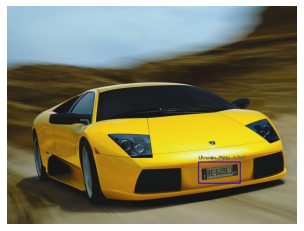

In [ ]:
show_detected_objects("car6.jpg")

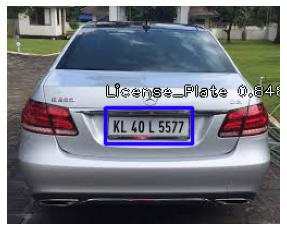

In [ ]:
show_detected_objects("Car1.jpg")

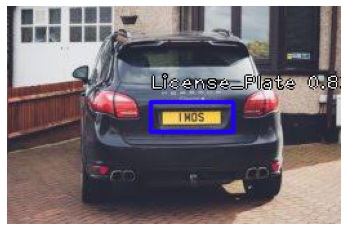

In [ ]:
show_detected_objects("Car2.jpg")

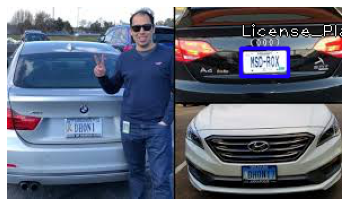

In [ ]:
show_detected_objects("Car3.jpg")

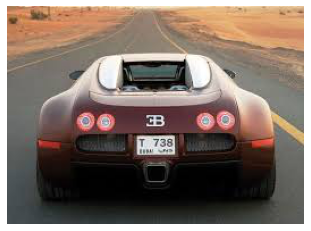

In [ ]:
show_detected_objects("Car4.jpg")

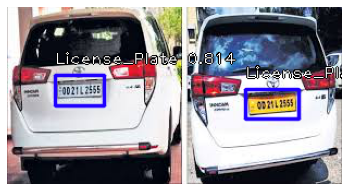

In [ ]:
show_detected_objects("Car7.jpg")